# euporie

Welcome to `euporie`, a terminal based interactive development environment for Jupyter notebooks.

- Use `Up` and `Down` to navigate, `Enter` to edit a cell, and `Esc` to stop editing a cell
- Use `Ctrl+Enter` to run or render a cell, or `Shift+Enter` to additionally select the next cell.
- You can view all keyboard shortcuts in the `Help` menu
- The online documentation is available at [https://euporie.readthedocs.io](https://euporie.readthedocs.io)
---

## Markdown Cells

`euporie` will render markdown cells in notebooks, including elements such as:

> Quote blocks

1. Ordered lists
    - Unordered lists
    - (Another list item)
2. **Bold**, *Italic*, ~~strikethrough~~, `code`

```python
def code_blocks():
    return True
```

| Tables       | *with* | ~~formatting~~ |
|-------------:|:------:|:---------------|
| **and**      | cell   | alignment      |

Inline maths: $x =\frac{-b \pm \sqrt{\frac{1}{2} a b^2}}{2a}$ and maths blocks:

$$
f = \sum_{i = 0}^{\infty} \frac{f^{(i)}(0)}{i!} x^i
$$

Links: [https://euporie.readthedocs.io](https://euporie.readthedocs.io)

Inline images ![](https://user-images.githubusercontent.com/12154190/160242688-440c67ca-fdba-4ca4-a941-a35e200f9813.svg) in paragraphs.

---

## Cell Output

`Euporie` will also render the output of code cells.

This includes displaying Markdown, LaTeX, Images, HTML, SVG, JSON, and ANSI text:

In [1]:
display({"text/html": "<b>Bold</b> <u>Underlined</u> <i>Italic</i>"}, raw=True)

Bold Underlined Italic

In [2]:
display({"text/latex": r"$x =\frac{-b \pm \sqrt{\frac{1}{2} a b^2}}{2a}$"}, raw=True)

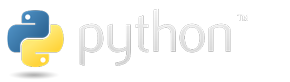

In [3]:
from IPython.display import *
import urllib.request
data = urllib.request.urlopen("https://www.python.org/static/img/python-logo.png").read()
Image(data)

This means you can use libraries like `pandas`, and display dataframes as you would expect:

In [4]:
import pandas as pd
import numpy as np

x = np.arange(20_000)

df = pd.DataFrame(
    {
        col: np.random.beta(i+1, 3, x.shape)
        for col, i in zip("abcd", [0, 2, 4, 6])
    },
    index = x,
)
df.head(15).style.background_gradient(cmap="viridis")

,a,b,c,d
0,0.003259,0.774210,0.896454,0.780203
1,0.004151,0.442622,0.847817,0.637673
2,0.001761,0.229524,0.757974,0.890007
3,0.269210,0.794629,0.863608,0.874150
4,0.047546,0.850900,0.797513,0.807209
5,0.055865,0.431414,0.560731,0.574832
6,0.146059,0.382183,0.598058,0.698844
7,0.079312,0.843316,0.518904,0.542317
8,0.137434,0.664604,0.420789,0.805205
9,0.168505,0.358604,0.532415,0.957759


`euporie` can render images using Sixel graphics if your terminal supports it. Otherwise it will fall back to using character-based terminal graphics.

This means you can produce plots with `matplotlib` and `euporie` will display them in the best way it can:

It can also display SVG output:

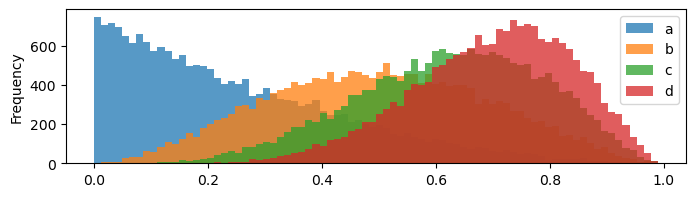

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8,2), facecolor="#FFF")
df.plot.hist(ax=ax, bins=80, alpha=0.75)
plt.show()

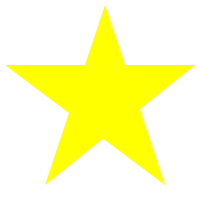

In [6]:
from IPython.display import SVG

SVG(
    '<svg width="200" height="200"><polygon points="105,5 45,185 195,65 5,65 165,185" fill="yellow" /></svg>'
)

Euporie can display JSON output interactively. Try clicking to expand and collapse items in the output:

In [7]:
from IPython.display import JSON

JSON(
    {
        "number": 123.456,
        "bool": True,
        "string": "This is a string",
        "list": ["First", "Second", "Third", "Fourth"],
        "dict": {
            "number": 123.456,
            "bool": True,
            "string": "This is a string",
            "list": ["First", "Second", "Third", "Fourth"],
        },
    },
    expanded=True,
    root="My JSON document",
)

<IPython.core.display.JSON object>

`euporie` supporst ANSI output, so  works with libraries like `tqdm` and `rich`:

In [ ]:
import time
from tqdm import tqdm

for i in tqdm(range(20), ncols=100):
    time.sleep(0.2)

In [ ]:
from rich.progress import track

for _ in track(range(20)):
    time.sleep(0.2)

This means it can also display colored output from external commands:

In [ ]:
!exa -l --icons --group-directories-first

## Requesting input

`euoporie` can response to requests for user input from the kernel (press enter to send your input):

In [ ]:
name = input("Enter your name:")
print(f"Hello {name}")

## `ipywidgets`

Euporie supports most of the widgets in `ipywidgets`, allowing you to build interactive applications inside your notebook in the terminal.

Run the following cell to try it out:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import widgets as w
from ipywidgets import interactive

def plot(n, color):
    x = np.arange(-20, 20, 0.1)
    y = np.sin(n*x) / x
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(x, y, c=color, lw=5)
    plt.show()

n=w.IntSlider(description="n", value=2, min=-10, max=10)
color = w.ColorPicker(value="red", description="Colour")
output = w.interactive_output(plot, {'n':n, 'color': color})

w.HBox([w.VBox([n, color]), output])

---

If you like `euporie`, please [star it on GitHub](https://github.com/joouha/euporie/)

⭐ https://github.com/joouha/euporie/